# Volume 3: Pandas IV (Time Series).
    <Erin Matheson>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

# Matplotlib customizations.
# plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1
The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016.
Read the data into a `Series` or `DataFrame` with a `DatetimeIndex` as the index.
Drop rows with missing values, cast the `"VALUES"` column to floats, then plot the data.

In [2]:
djia = pd.read_csv("DJIA.csv", index_col="DATE")


In [3]:
djia.index = pd.to_datetime(djia.index)

In [4]:
#want everywhere where it's Not a period (no value)
djia = djia[djia["VALUE"] != '.']
# Or change those places to Nans
# dija = dija.replace(to_replace='.', value=np.nan)

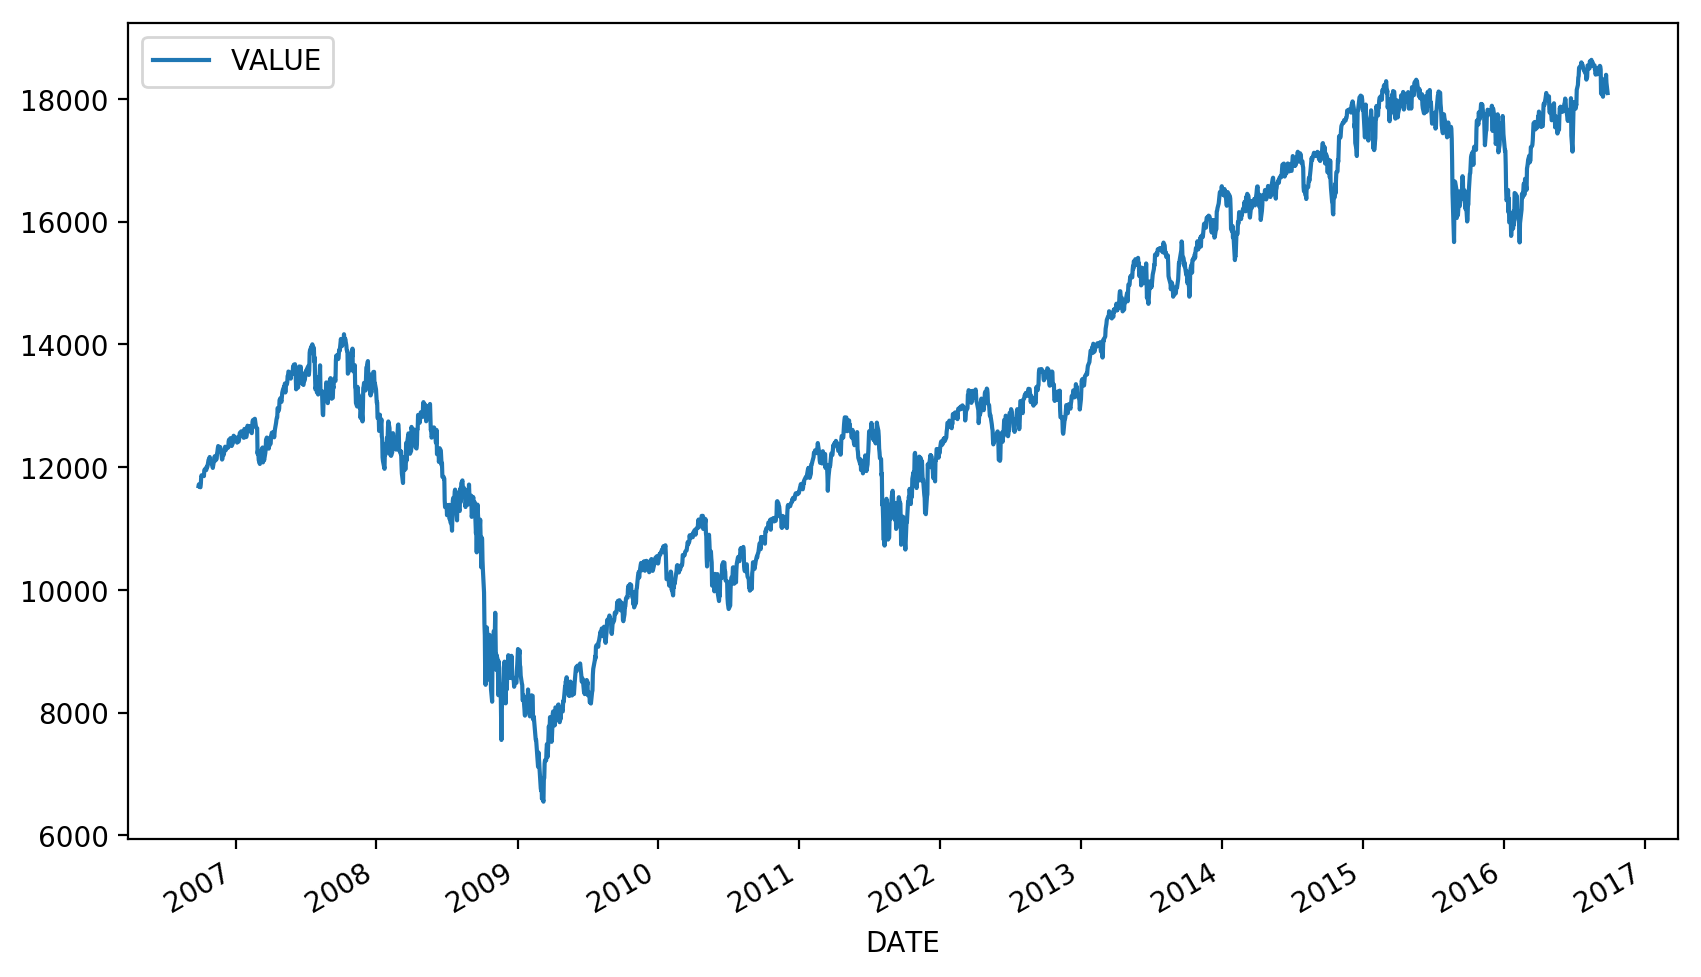

In [5]:
djia["VALUE"] = djia["VALUE"].astype(float)
djia.plot()

In [6]:
djia['2010-6']


,VALUE
DATE,
2010-06-01,10024.02
2010-06-02,10249.54
2010-06-03,10255.28
2010-06-04,9931.97
2010-06-07,9816.49
2010-06-08,9939.98
2010-06-09,9899.25
2010-06-10,10172.53
2010-06-11,10211.07


In [7]:
djia['2011-7'].mean()

VALUE    12512.325
dtype: float64

In [8]:
years = djia.resample("A") #annually

In [9]:
years.mean()

,VALUE
DATE,
2006-12-31,12147.211
2007-12-31,13178.253
2008-12-31,11244.049
2009-12-31,8885.655
2010-12-31,10668.589
2011-12-31,11957.570
2012-12-31,12965.287
2013-12-31,15009.523
2014-12-31,16777.691


In [10]:
years.agg(len)

,VALUE
DATE,
2006-12-31,66.0
2007-12-31,251.0
2008-12-31,253.0
2009-12-31,252.0
2010-12-31,252.0
2011-12-31,252.0
2012-12-31,250.0
2013-12-31,252.0
2014-12-31,252.0


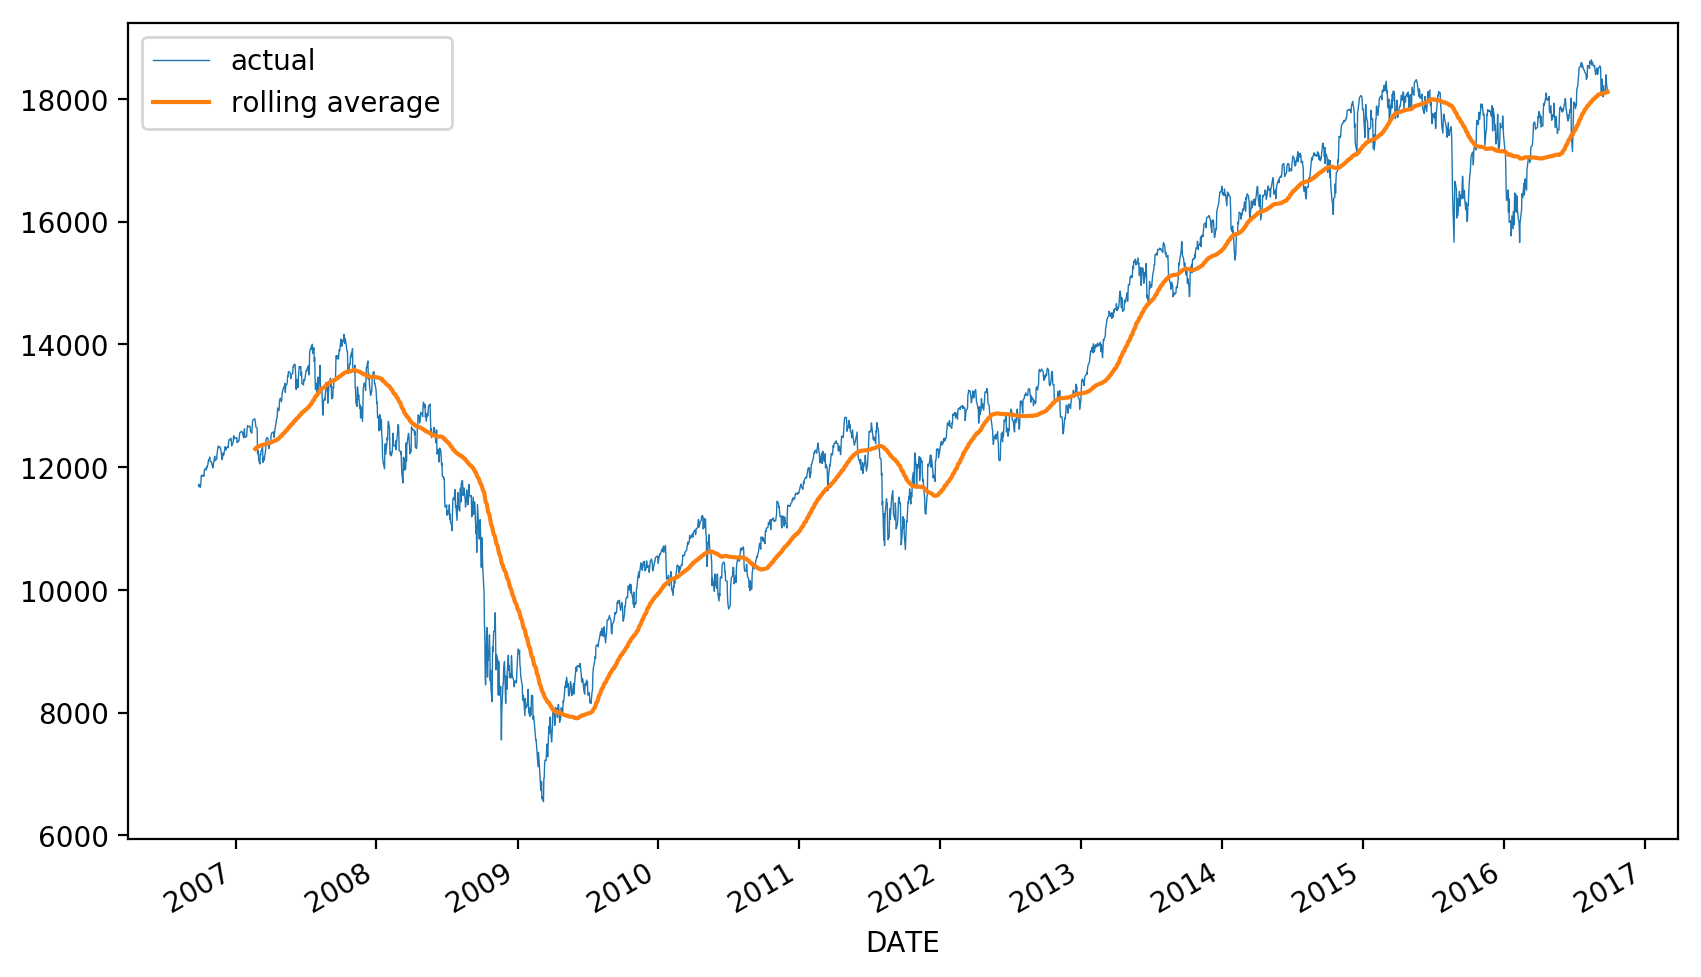

In [11]:
ax = plt.subplot(111)
djia.plot(lw=0.5, ax=ax)
#lags behind a little bit
djia.rolling(window=100).mean().plot(ax=ax)
ax.legend(['actual', 'rolling average'])


## Problem 2

The file `paychecks.csv` contains values of an hourly employee's last 93 paychecks.
He started working March 13, 2008.
This company hands out paychecks on the first and third Fridays of the month.
Read in the data, using `pd.date_range()` to generate the DatetimeIndex.
Plot the data.

In [12]:
paychecks = pd.read_csv("paychecks.csv", index_col =False) # ?False?

dt1 = pd.date_range(start='3/13/2008', periods=47, freq='WOM-1FRI')
# put period=93/2 or 94/2 to make it above since rounds down?
dt2 = pd.date_range(start='3/13/2008', periods=47, freq='WOM-3FRI')
DTindex = dt1.union(dt2)[:92]

paychecks = paychecks.set_index(keys=DTindex)

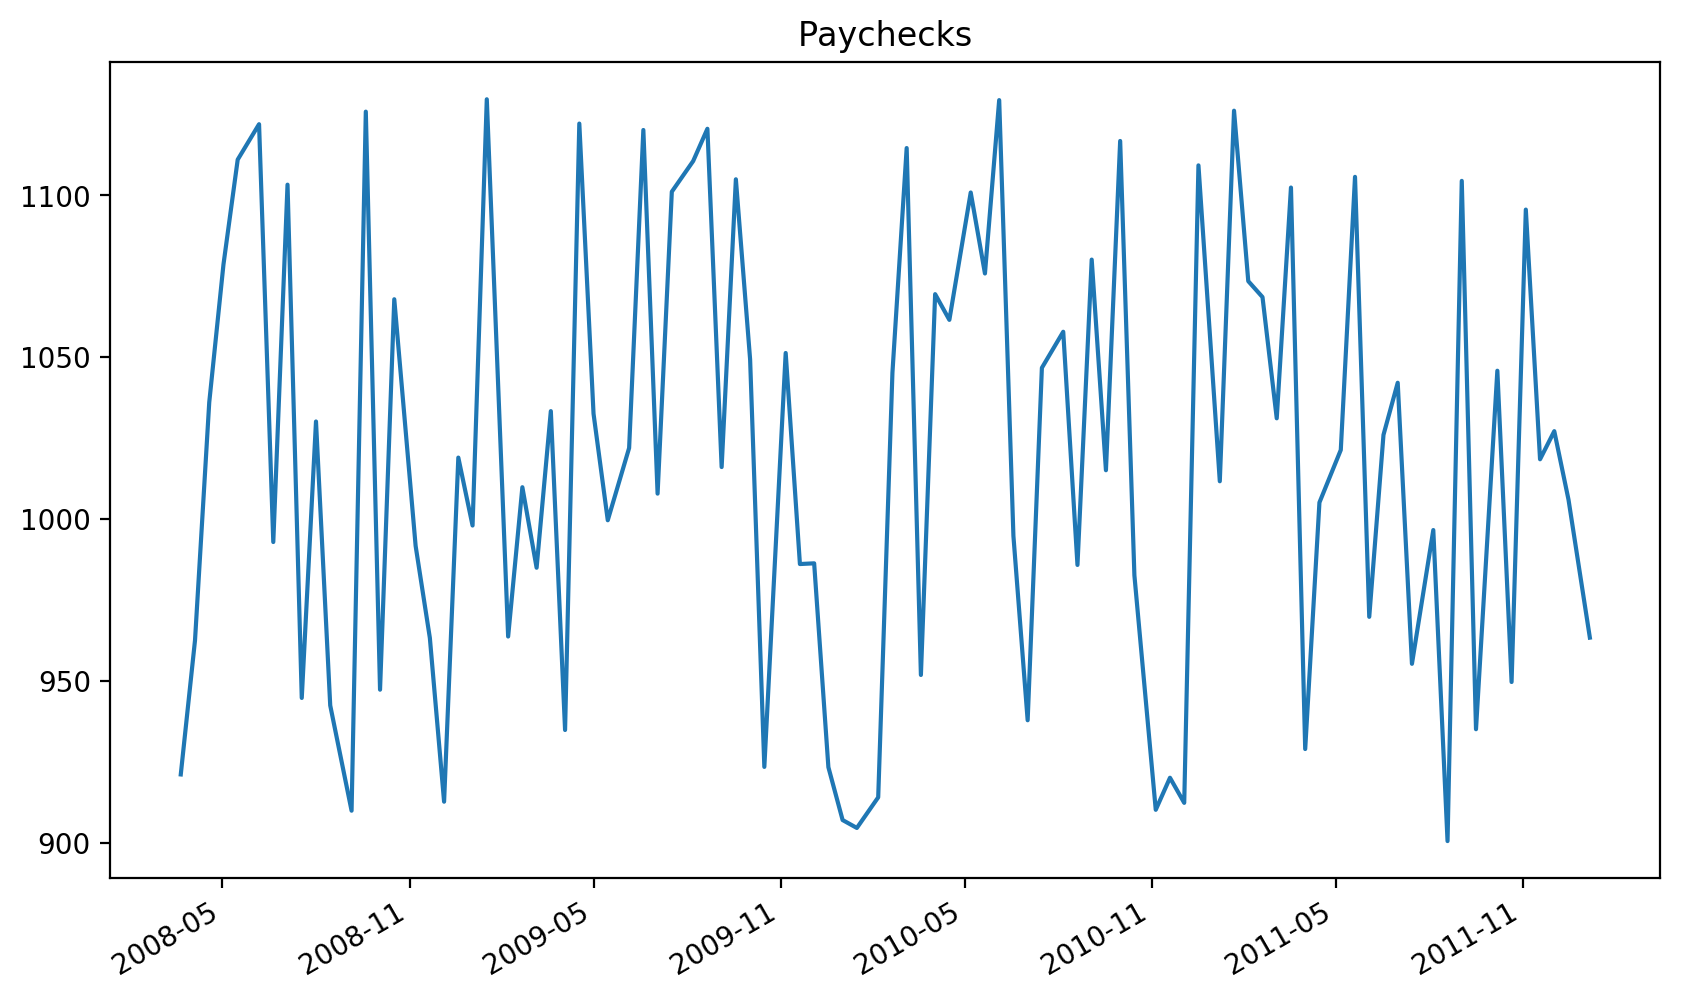

In [13]:
paychecks.plot(title='Paychecks', legend=False)

plt.show()

## Problem 3

The file `finances.csv` contains a list of simulated quarterly earnings and expense totals from a fictional company.
Load the data into a `Series` or `DataFrame` with a `PeriodIndex` with a quarterly frequency.
Assume the fiscal year starts at the beginning of September and that the data begins in September 1978.
Plot the data.

In [14]:
finances = pd.read_csv("finances.csv")
finances.tail(5)

,EARNINGS,EXPENSES
79,700187.84,226455.71
80,787777.93,321993.31
81,786363.01,253464.27
82,828074.33,234450.33
83,818044.38,286127.91


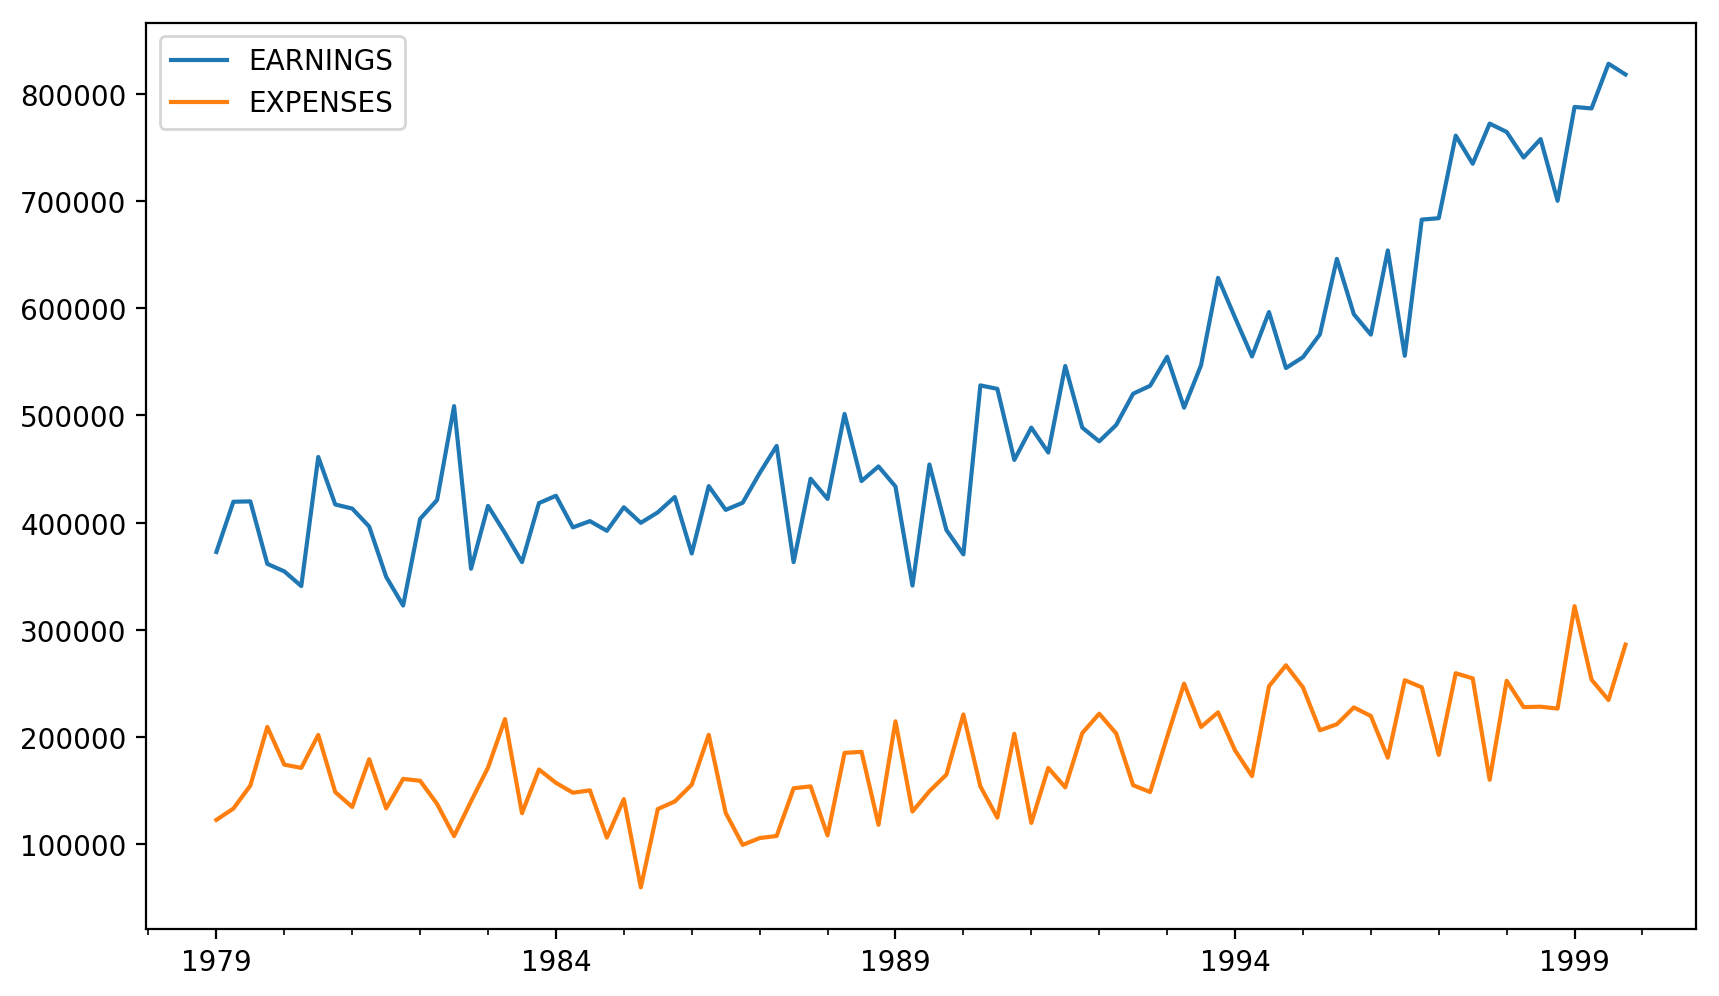

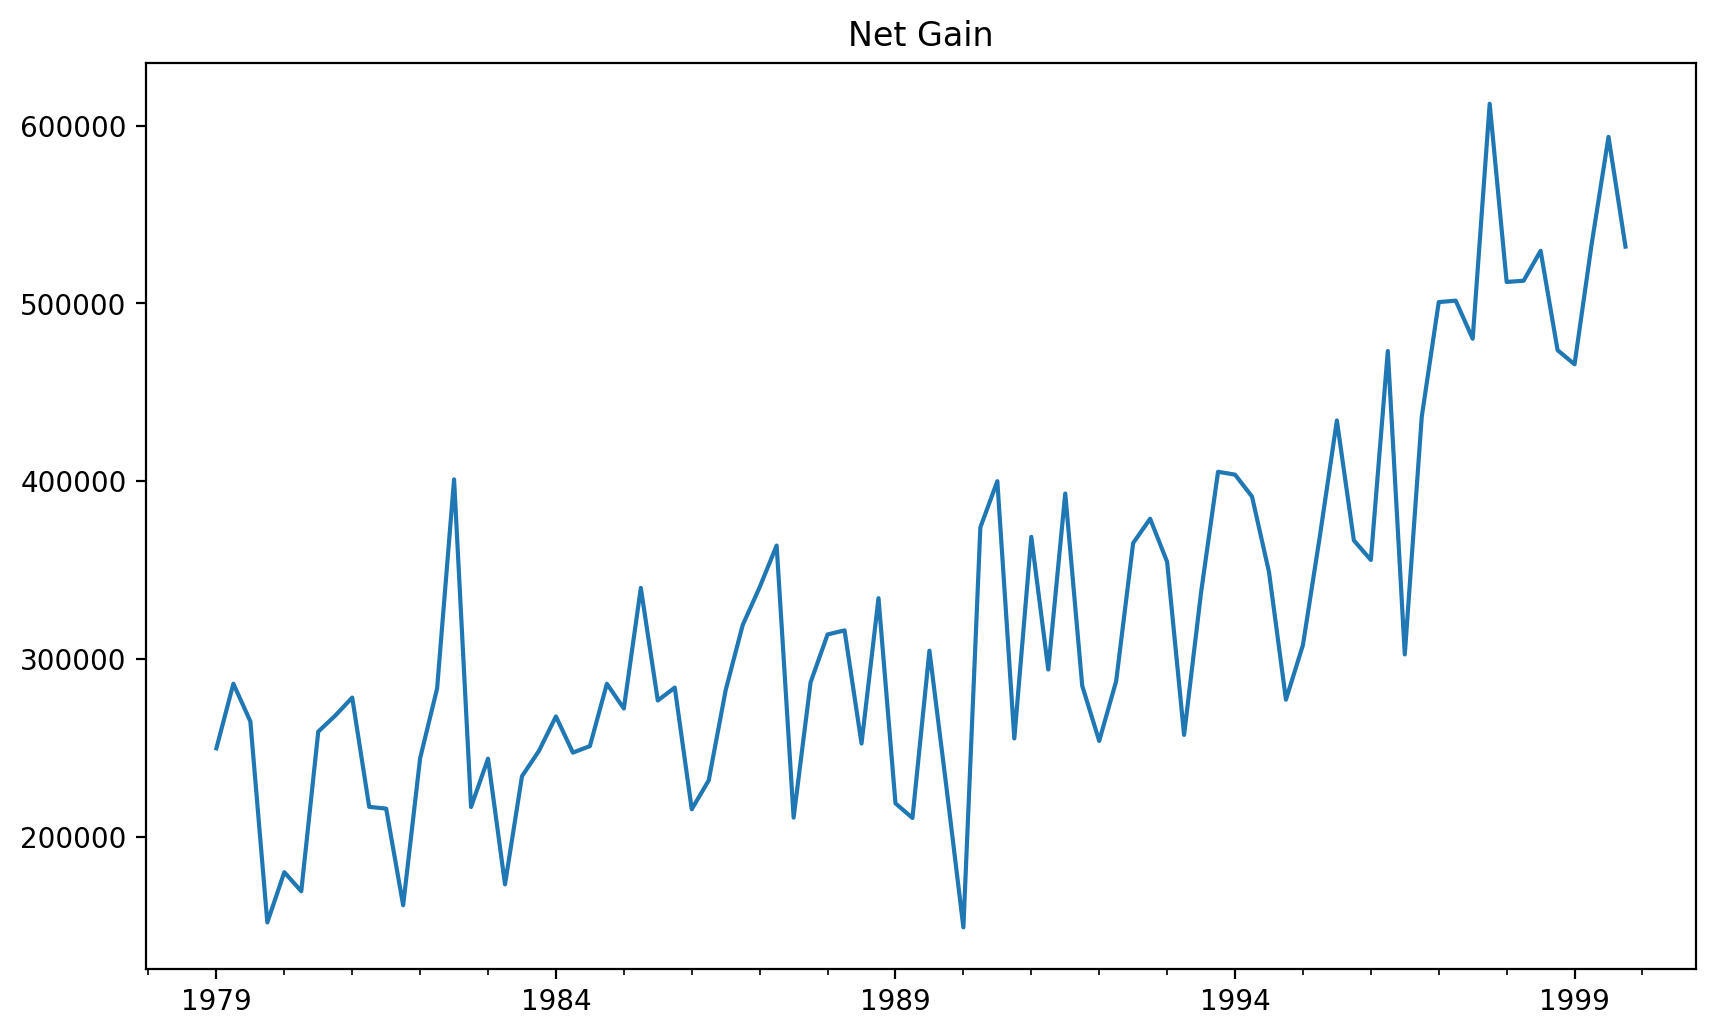

In [15]:
finances.index = pd.period_range(start='1978-09', periods=len(finances), freq='Q-AUG')
finances.plot()
plt.show()

(finances["EARNINGS"]-finances['EXPENSES']).plot()
plt.title("Net Gain")
plt.show()

## Problem 4

The file `website_traffic.csv` contains records for different visits to a fictitious website.
Read in the data, calculate the duration of each visit (in seconds), and convert the index to a `DatetimeIndex`.
Use downsampling to calculate the average visit duration by minute, and the average visit duration by hour.
Plot both results on the same graph.

In [16]:
webTraffic = pd.read_csv('website_traffic.csv')
webTraffic.sample(3)

,IP,ENTER,LEAVE
2909,214.105.93.102,2016-10-07 05:30:05,2016-10-07 05:33:51
8782,216.145.91.5,2016-10-07 14:37:30,2016-10-07 14:38:03
10750,123.57.111.225,2016-10-07 17:41:33,2016-10-07 17:42:09


In [17]:

webTraffic['ENTER'] = pd.to_datetime(webTraffic['ENTER'])

webTraffic['LEAVE'] = pd.to_datetime(webTraffic['LEAVE'])

webTraffic['duration'] = webTraffic['LEAVE'] - webTraffic['ENTER']
# get a Timedelta object when we subtract 2 Timestamp objects

webTraffic['duration'] = webTraffic['duration'].astype('timedelta64[s]')
                                              # now converted to seconds

webTraffic

,IP,ENTER,LEAVE,duration
0,187.162.243.198,2016-10-07 01:01:01,2016-10-07 01:04:57,236.0
1,119.200.107.183,2016-10-07 01:01:01,2016-10-07 01:03:47,166.0
2,170.158.132.203,2016-10-07 01:01:06,2016-10-07 01:03:09,123.0
3,24.169.81.199,2016-10-07 01:01:18,2016-10-07 01:09:36,498.0
4,186.129.160.43,2016-10-07 01:01:20,2016-10-07 01:08:32,432.0
5,21.122.244.31,2016-10-07 01:01:36,2016-10-07 01:08:52,436.0
6,179.89.29.143,2016-10-07 01:01:46,2016-10-07 01:04:14,148.0
7,154.166.54.177,2016-10-07 01:01:48,2016-10-07 01:02:04,16.0
8,109.194.31.156,2016-10-07 01:01:51,2016-10-07 01:05:31,220.0
9,185.8.220.76,2016-10-07 01:01:51,2016-10-07 01:10:07,496.0


Text(0,0.5,'Visit time (seconds)')

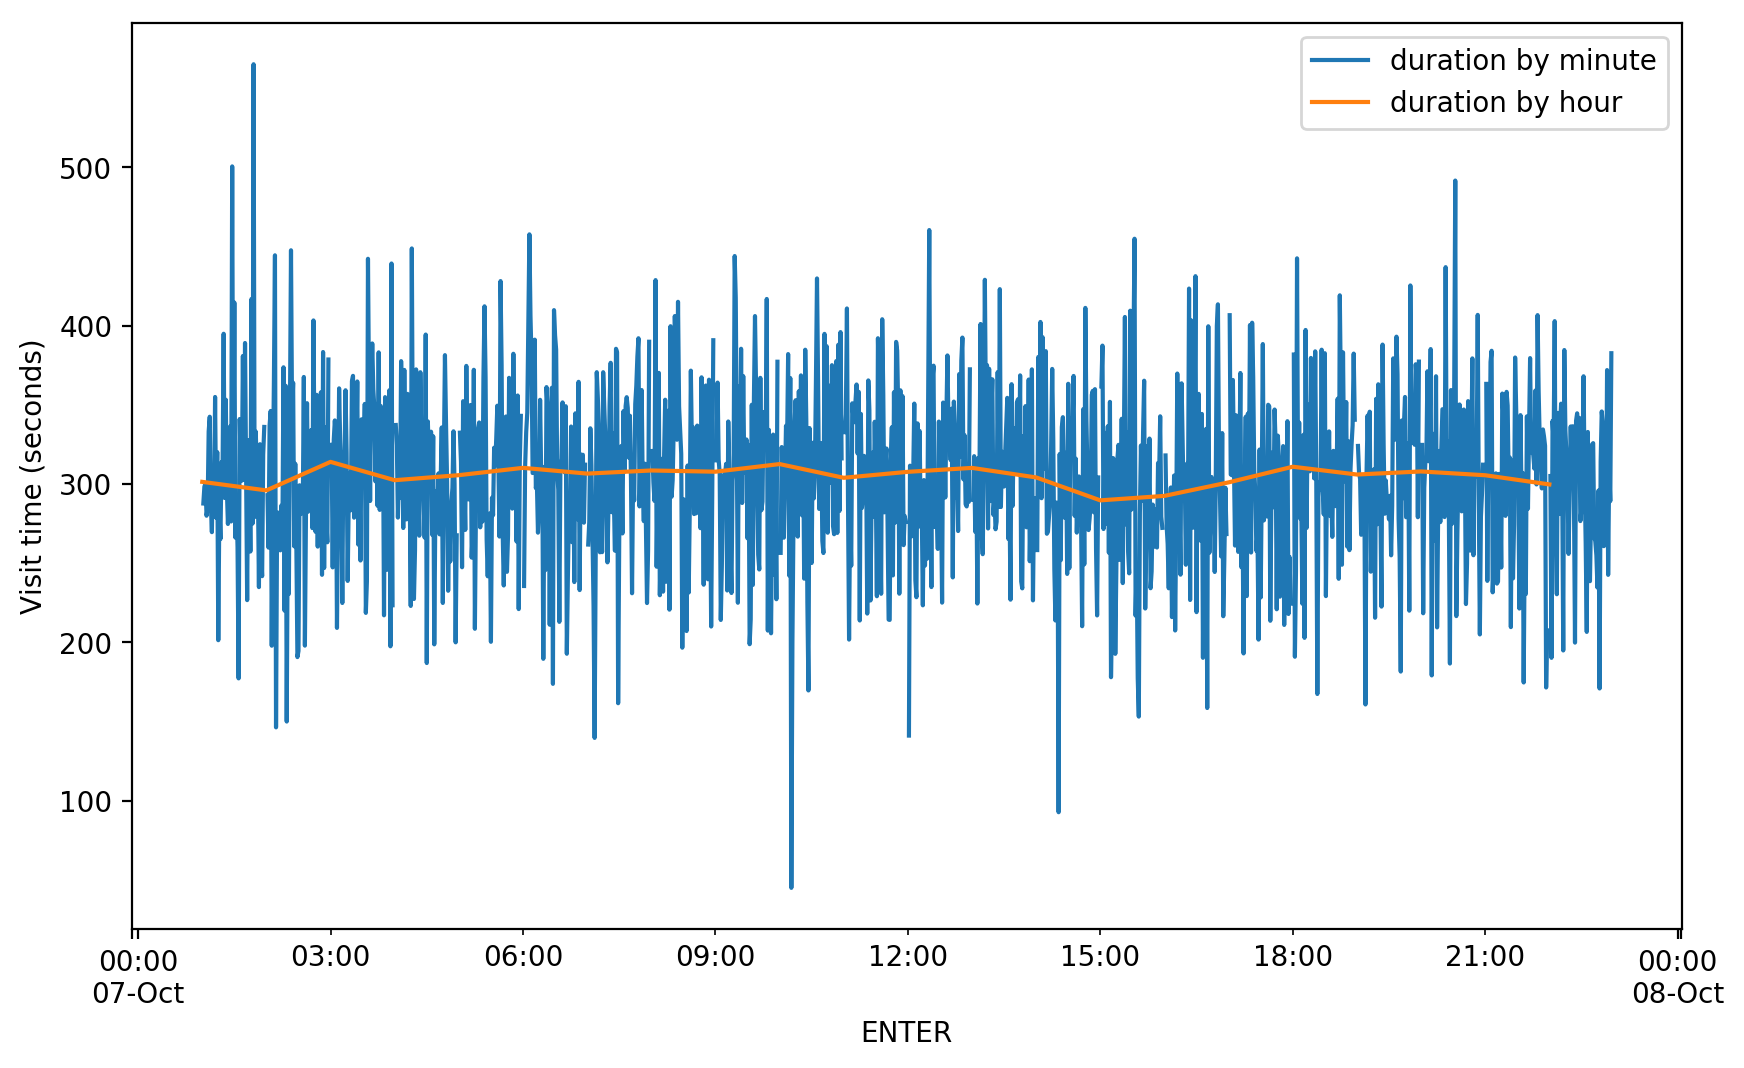

In [18]:
# use downsampling to calculate average visit duration 
# in Minutes & by Hour - plot both results

ax = plt.subplot(111)
minutes = webTraffic.resample("T", on='ENTER')
minutes.agg(np.mean).plot(ax=ax)

hours = webTraffic.resample("H", on='ENTER')
hours.agg(np.mean).plot(ax=ax)
ax.legend(['duration by minute', 'duration by hour'])
plt.ylabel("Visit time (seconds)")


## Problem 5
Compute the following information about the DJIA dataset from Problem 1.
- The single day with the largest gain.
- The single day with the largest loss.
- The month with the largest gain.
- The month with the largest loss.

For the monthly statistics, define the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

In [19]:
# single day with largest gain from djia

DayChange = djia - djia.shift(1)

month_djia = djia.resample("M")

f = lambda x: x[-1] - x[0]

MonthChange = month_djia.agg(f)


print("Day with largest gain: {}".format(DayChange['VALUE'].argmax()))
print("Day with smallest gain: {}".format(DayChange["VALUE"].argmin()))

print("Month with largest gain: {}".format(MonthChange["VALUE"].argmax()))
# just means October- it uses the last day by default
print("Month with largest loss: {}".format(MonthChange["VALUE"].argmin()))


Day with largest gain: 2008-10-13 00:00:00
Day with smallest gain: 2008-09-29 00:00:00
Month with largest gain: 2015-10-31 00:00:00
Month with largest loss: 2008-10-31 00:00:00


/Users/matheson/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':
/Users/matheson/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]
/Users/matheson/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  from ipykernel import kernelapp 

## Problem 6

Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.
- The original data points.
- Rolling average.
- Exponential average.
- Minimum rolling values.
- Maximum rolling values.

Describe how varying the length of the window changes the approximation to the data.

Text(0.5,1,'EWMA')

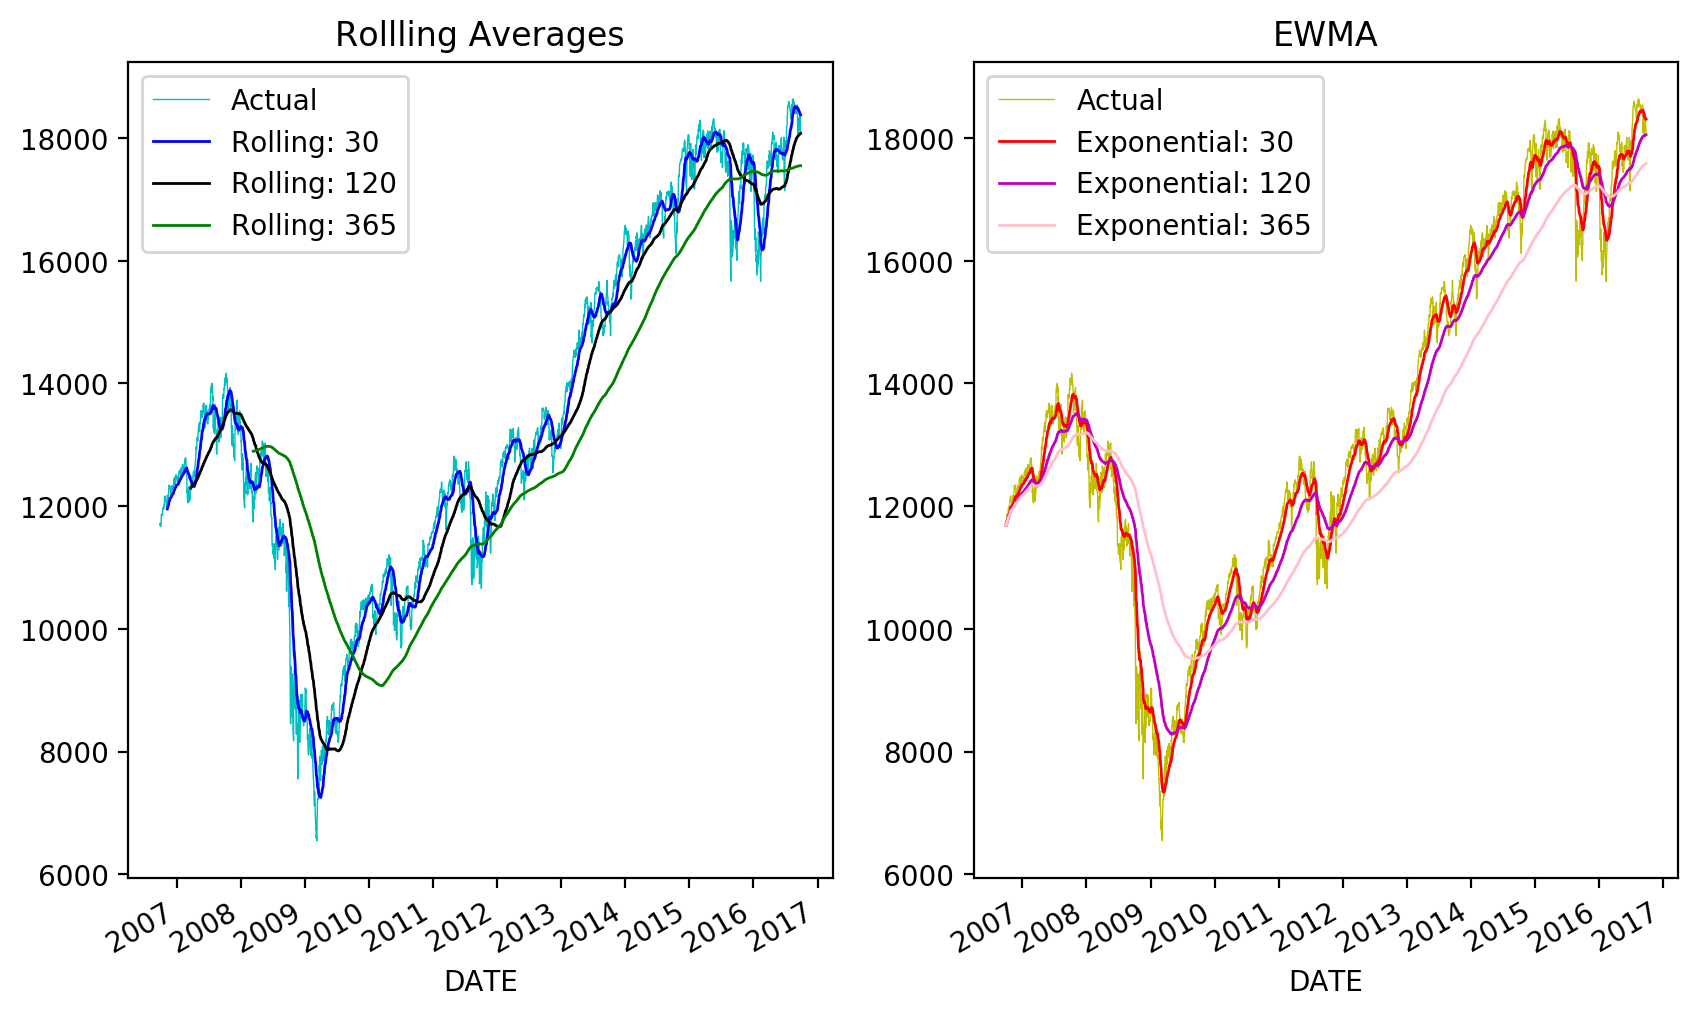

In [20]:
ax = plt.subplot(121)
ax2 = plt.subplot(122)

djia.plot(color='c', lw=.5, ax=ax)
djia.plot(color='y', lw=.5, ax=ax2)

djia.rolling(window=30).mean().plot(color='b', lw=1, ax=ax)
djia.rolling(window=120).mean().plot(color='k', lw=1, ax=ax)
djia.rolling(window=365).mean().plot(color='g', lw=1, ax=ax)

djia.ewm(span=30).mean().plot(color='r', lw=1, ax=ax2)
djia.ewm(span=120).mean().plot(color='m', lw=1, ax=ax2)
djia.ewm(span=365).mean().plot(color='pink', lw=1, ax=ax2)

ax.legend(["Actual", "Rolling: 30", "Rolling: 120", "Rolling: 365"], loc="upper left", fontsize=10)
ax.set_title("Rollling Averages")
ax2.legend(["Actual", "Exponential: 30", "Exponential: 120", "Exponential: 365"], loc="upper left", fontsize=10)
ax2.set_title("EWMA")


The higher the window (or span?) the more the lag time seems to be...? Not as accurate? Doesn't go as deep into hills and valleys?

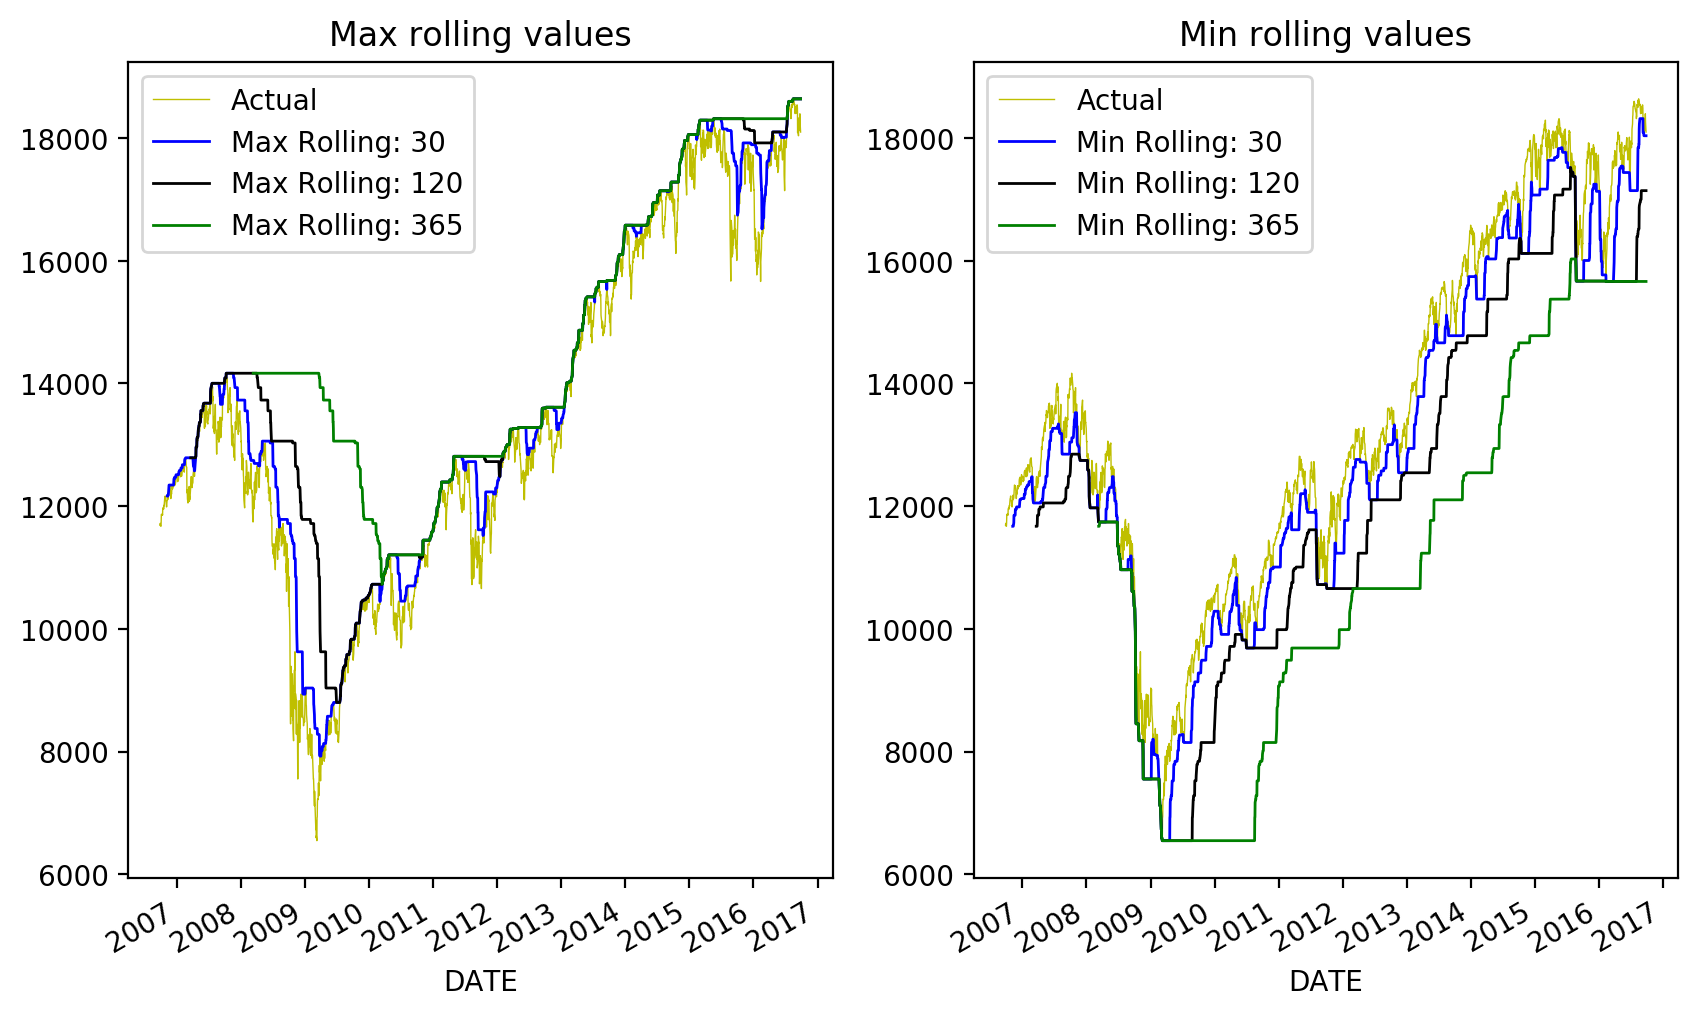

In [21]:
ax1 = plt.subplot(121)

djia.plot(color='y', lw=.5, ax=ax1)
djia.rolling(window=30).max().plot(color='b', lw=1, ax=ax1)
djia.rolling(window=120).max().plot(color='k', lw=1, ax=ax1)
djia.rolling(window=365).max().plot(color='g', lw=1, ax=ax1)
ax1.set_title("Max rolling values")
ax1.legend(['Actual', 'Max Rolling: 30', 'Max Rolling: 120', 'Max Rolling: 365'])

ax3 = plt.subplot(122)

djia.plot(color='y', lw=.5, ax=ax3)
djia.rolling(window=30).min().plot(color='b', lw=1, ax=ax3)
djia.rolling(window=120).min().plot(color='k', lw=1, ax=ax3)
djia.rolling(window=365).min().plot(color='g', lw=1, ax=ax3)
ax3.set_title("Min rolling values")
ax3.legend(['Actual', 'Min Rolling: 30', 'Min Rolling: 120', 'Min Rolling: 365'])
